In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from river import tree
from river import metrics
from river import stream

print("Libraries loaded.")

Libraries loaded.


In [2]:
DATA_PATH = "../data/nonlinear_sudden_rollingtorus_noise_and_redunce.csv"

df = pd.read_csv(DATA_PATH)

X = df.drop(columns=["label"])
y = df["label"]

print("Dataset ready.")

Dataset ready.


In [3]:
model = tree.HoeffdingTreeClassifier()

accuracy = metrics.Accuracy()

print("Model initialized.")

Model initialized.


In [4]:
accuracies = []
indices = []

for i, (xi, yi) in enumerate(stream.iter_pandas(X, y)):
    
    # Predict before learning
    y_pred = model.predict_one(xi)
    
    # Update metric
    if y_pred is not None:
        accuracy.update(yi, y_pred)
        accuracies.append(accuracy.get())
        indices.append(i)
    
    # Learn
    model.learn_one(xi, yi)
    
print("Streaming complete.")

Streaming complete.


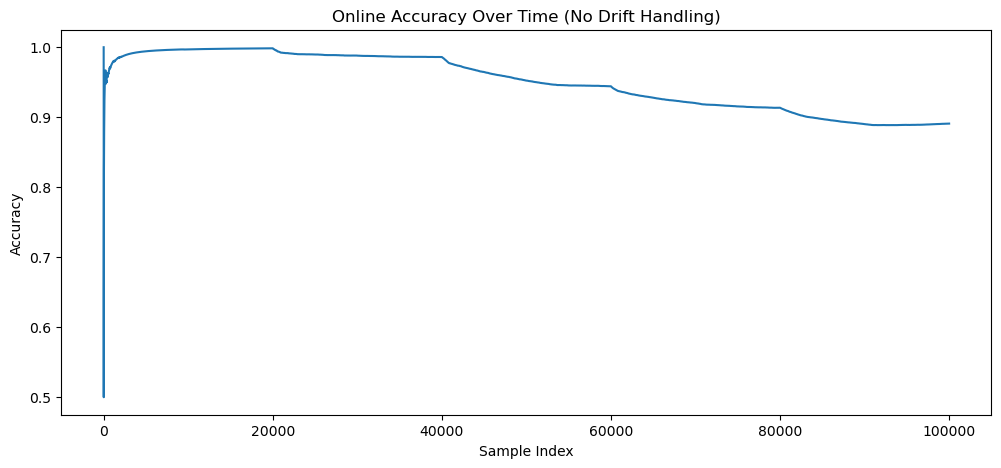

In [5]:
plt.figure(figsize=(12,5))
plt.plot(indices, accuracies)
plt.title("Online Accuracy Over Time (No Drift Handling)")
plt.xlabel("Sample Index")
plt.ylabel("Accuracy")
plt.show()

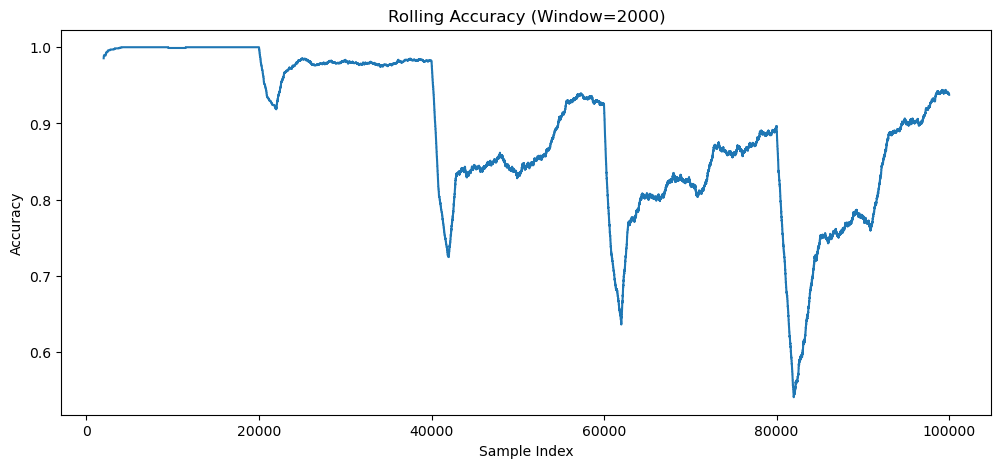

In [6]:
window_size = 2000
rolling_acc = []

correct_predictions = []

# Re-run streaming but store correctness
model = tree.HoeffdingTreeClassifier()

for xi, yi in stream.iter_pandas(X, y):
    y_pred = model.predict_one(xi)
    
    if y_pred is None:
        correct_predictions.append(0)
    else:
        correct_predictions.append(int(y_pred == yi))
    
    model.learn_one(xi, yi)

correct_series = pd.Series(correct_predictions)
rolling_acc = correct_series.rolling(window_size).mean()

plt.figure(figsize=(12,5))
plt.plot(rolling_acc)
plt.title(f"Rolling Accuracy (Window={window_size})")
plt.xlabel("Sample Index")
plt.ylabel("Accuracy")
plt.show()